In [811]:
import numpy as np # Одномерные и многомерные массивы (array)
import pandas as pd # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns # Еще больше красивой графики для визуализации данных
import sklearn # Алгоритмы машинного обучения
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

url = "https://raw.githubusercontent.com/karakurtnn/machine_learning/main/Employee.csv"
x = pd.read_csv(url)


x.info()
x.shape
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [812]:
x.isnull().sum()


Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

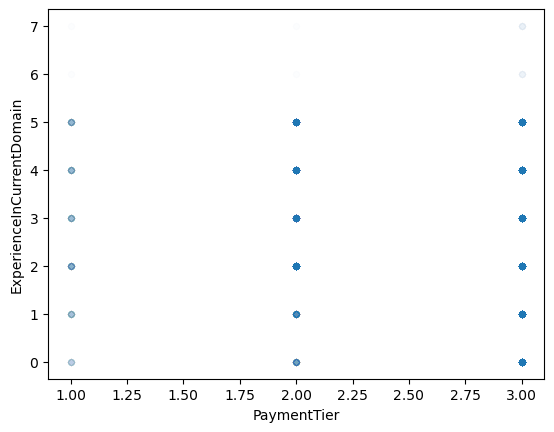

In [813]:
x.plot(kind='scatter',x='PaymentTier',y='ExperienceInCurrentDomain',alpha=0.01)
pass

In [814]:
# Настройка типов признаков в Pandas dataframe
x['Education'] = x['Education'].astype('category')
x['City'] = x['City'].astype('category')
x['PaymentTier'] = x['PaymentTier'].astype('category')
x['Gender'] = x['Gender'].astype('category')
x['EverBenched'] = x['EverBenched'].astype('category')
x['ExperienceInCurrentDomain'] = x['ExperienceInCurrentDomain'].astype('category')
x['LeaveOrNot'] = x['LeaveOrNot'].astype('category')
numerical_columns = [c for c in x.columns if x[c].dtype.name != 'category']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   category
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   category
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   category
 6   EverBenched                4653 non-null   category
 7   ExperienceInCurrentDomain  4653 non-null   category
 8   LeaveOrNot                 4653 non-null   category
dtypes: category(7), int64(2)
memory usage: 105.7 KB


In [815]:
categorical_columns = [c for c in x.columns if x[c].dtype.name == 'category']
print(categorical_columns)
numerical_columns   = [c for c in x.columns if x[c].dtype.name == 'int64']
print(numerical_columns)

['Education', 'City', 'PaymentTier', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot']
['JoiningYear', 'Age']


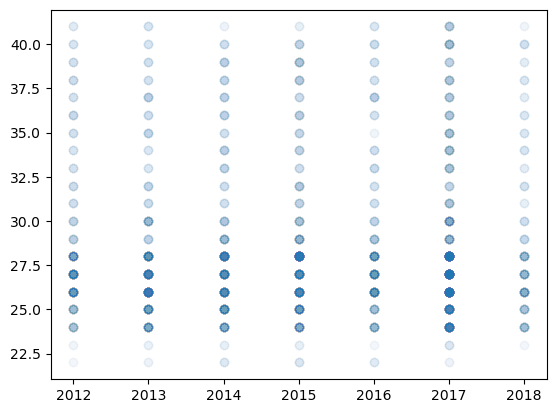

In [816]:

plt.scatter(x='JoiningYear', y='Age', data=x,alpha = 0.01)
pass

In [817]:
x['Age'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    22.0
0.010    22.0
0.050    24.0
0.100    24.0
0.500    28.0
0.900    38.0
0.950    39.0
0.990    41.0
0.995    41.0
Name: Age, dtype: float64

In [818]:
x['JoiningYear'].quantile([0.005,.01,.05,.1,.5,.9,.95,.99,.995])

0.005    2012.0
0.010    2012.0
0.050    2012.0
0.100    2012.0
0.500    2015.0
0.900    2017.0
0.950    2018.0
0.990    2018.0
0.995    2018.0
Name: JoiningYear, dtype: float64

In [819]:
x.describe()

,JoiningYear,Age
count,4653.000000,4653.000000
mean,2015.062970,29.393295
std,1.863377,4.826087
min,2012.000000,22.000000
25%,2013.000000,26.000000
50%,2015.000000,28.000000
75%,2017.000000,32.000000
max,2018.000000,41.000000


In [820]:
x.describe(include=['category'])

,Education,City,PaymentTier,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
count,4653,4653,4653,4653,4653,4653,4653
unique,3,3,3,2,2,8,2
top,Bachelors,Bangalore,3,Male,No,2,0
freq,3601,2228,3492,2778,4175,1087,3053


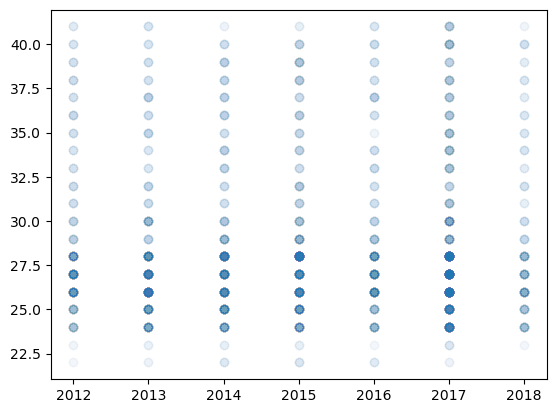

In [821]:


plt.scatter(x['JoiningYear'], x['Age'], alpha=0.01)
pass



In [822]:
x['ExperienceInCurrentDomain'].value_counts()

ExperienceInCurrentDomain
2    1087
4     931
5     919
3     786
1     558
0     355
7       9
6       8
Name: count, dtype: int64

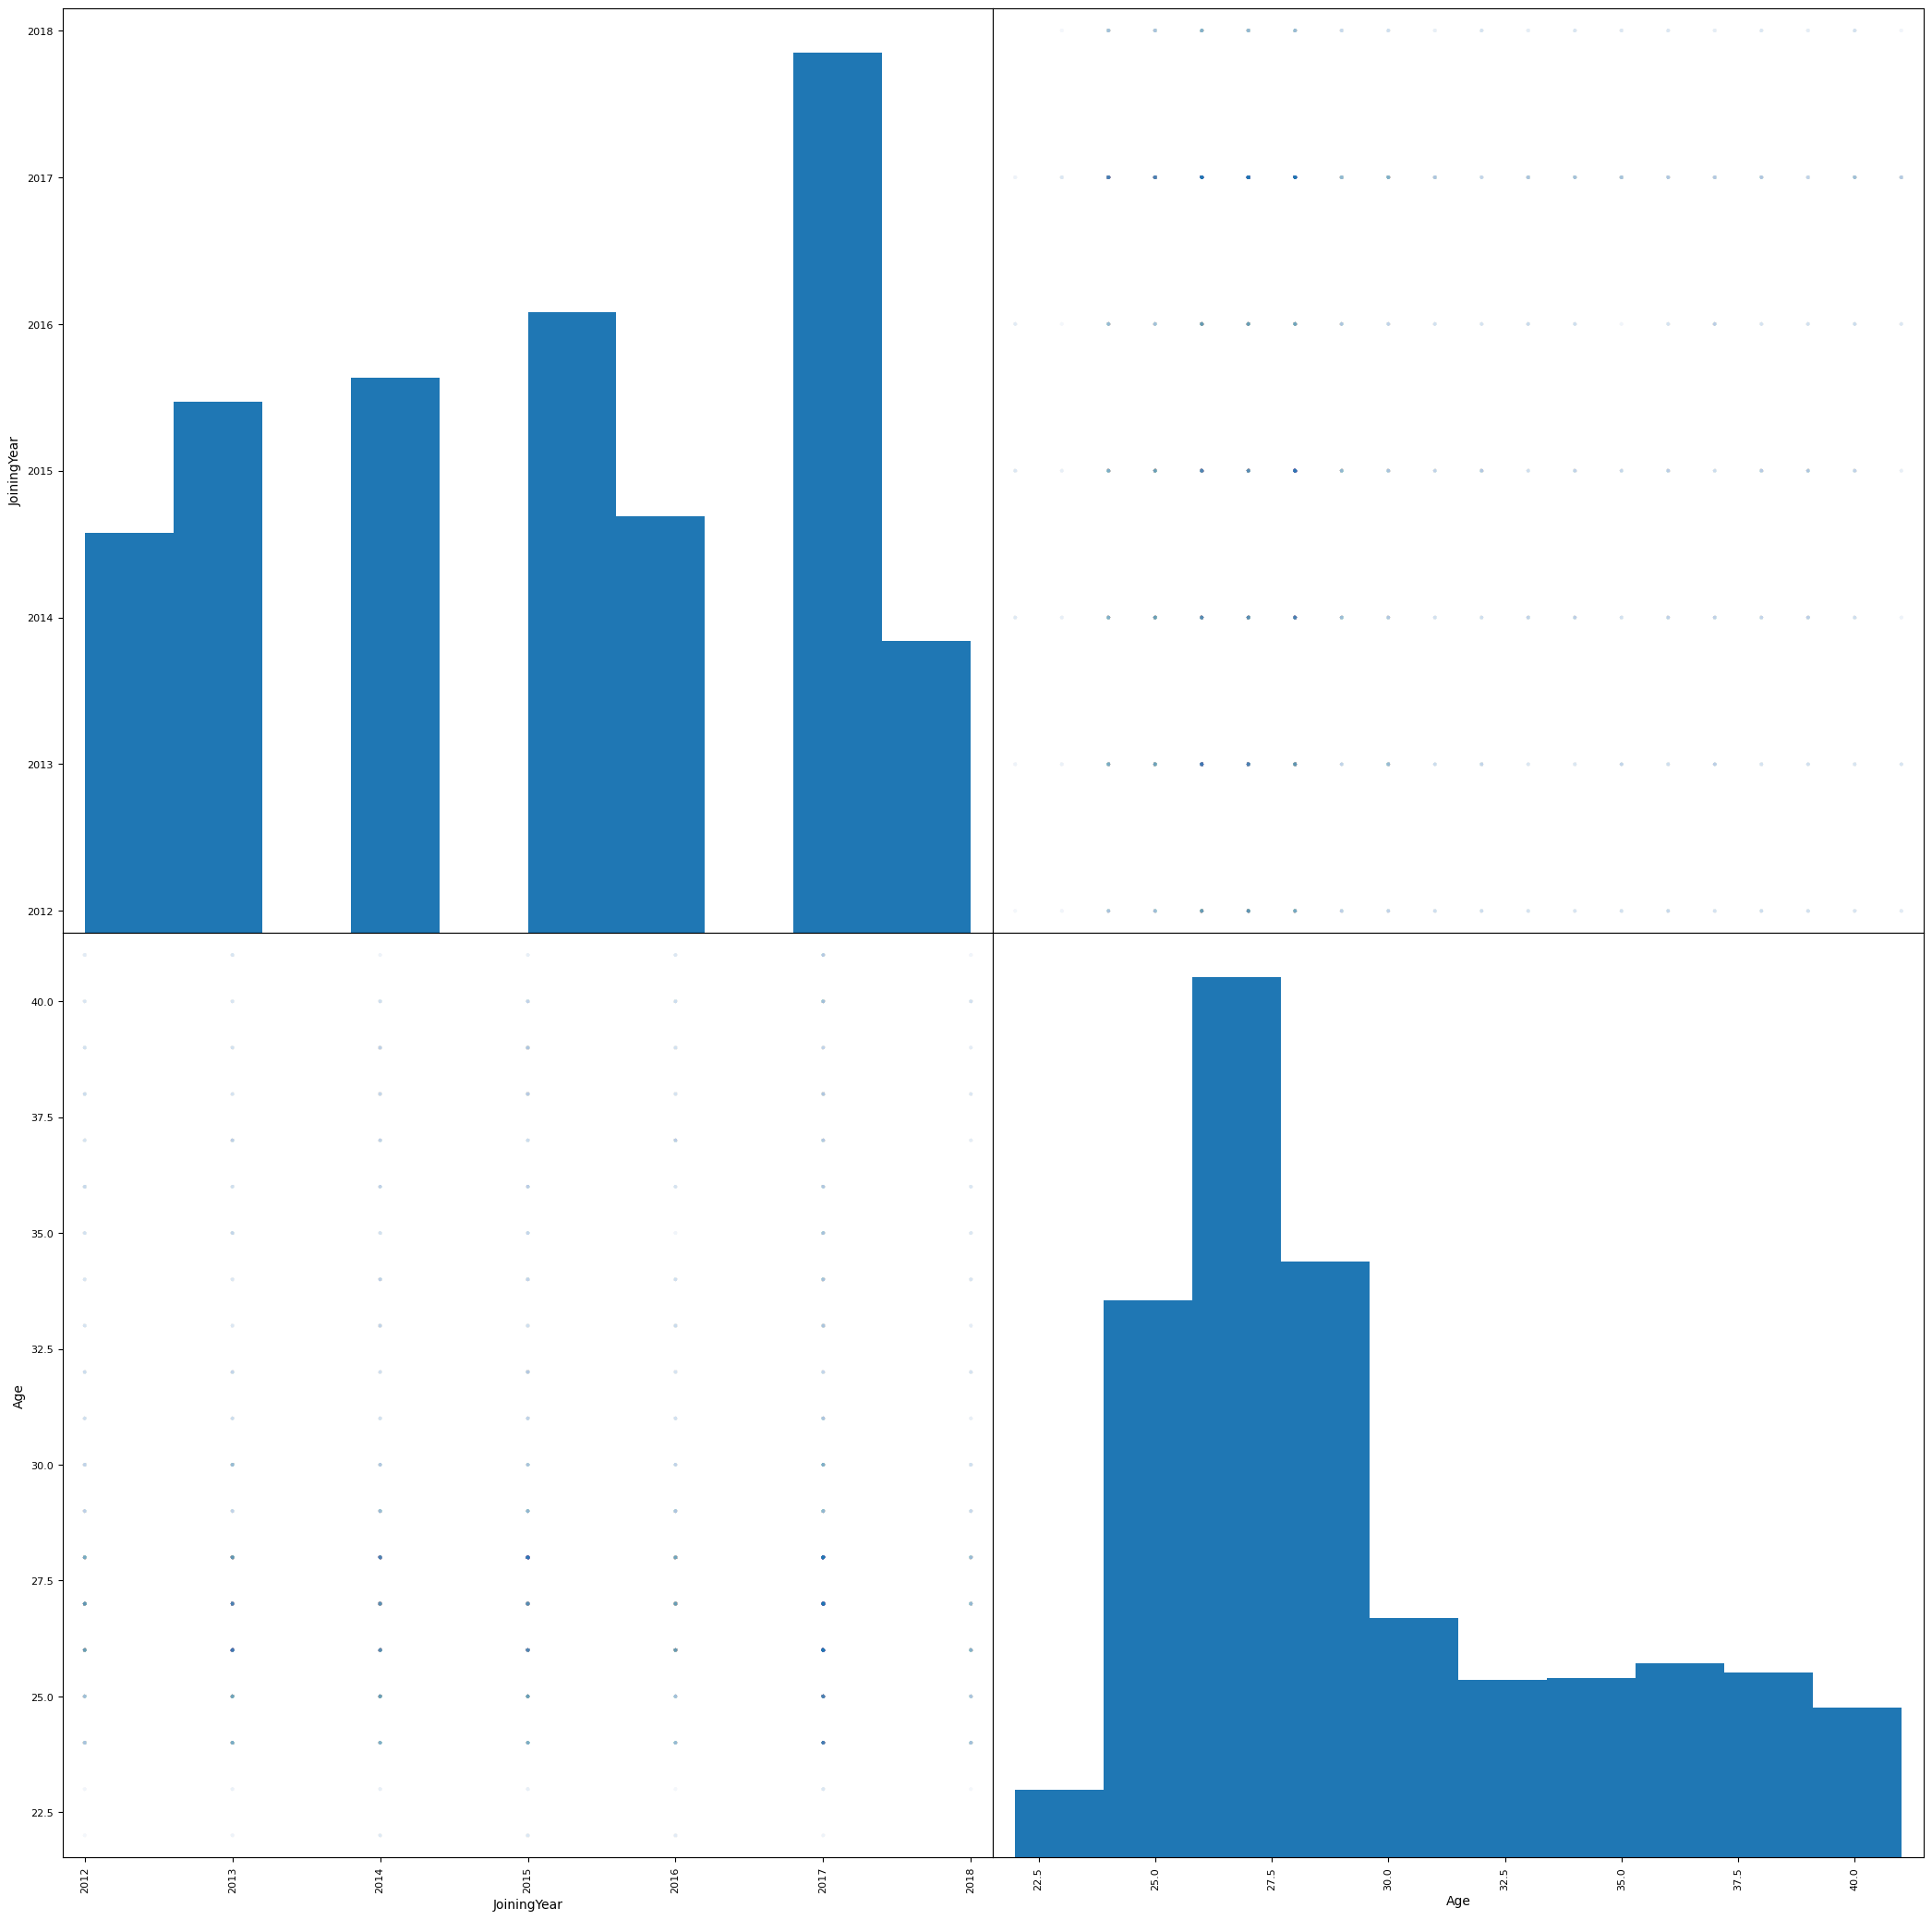

In [823]:
pd.plotting.scatter_matrix(x, figsize = (26, 26),alpha=0.01)
pass

C:\Users\karak\AppData\Local\Temp\ipykernel_7072\3144111107.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['Age'], bins=15)


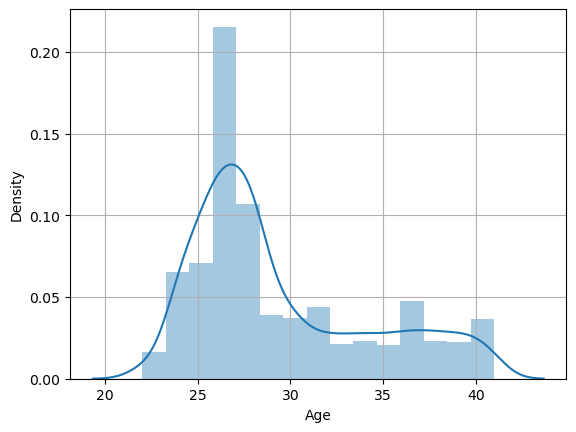

In [824]:
sns.distplot(x['Age'], bins=15)
plt.grid()
pass

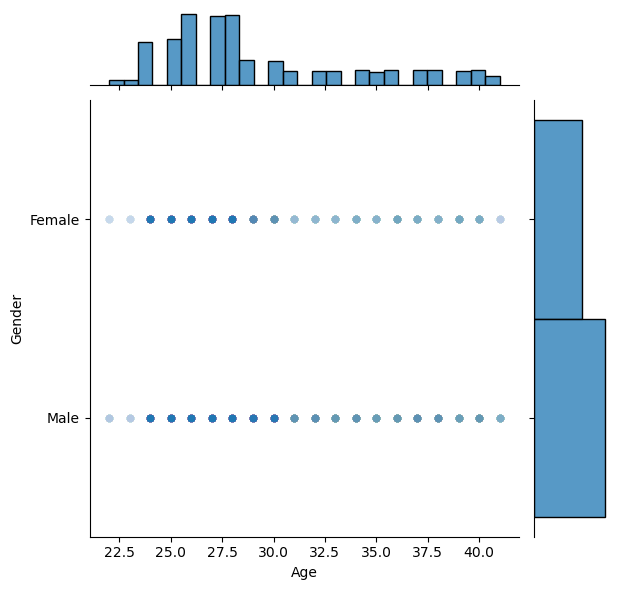

In [825]:
sns.jointplot(x='Age', y='Gender', alpha=0.01, data=x)
pass

C:\Users\karak\AppData\Local\Temp\ipykernel_7072\2646598178.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x['JoiningYear'], bins=15)


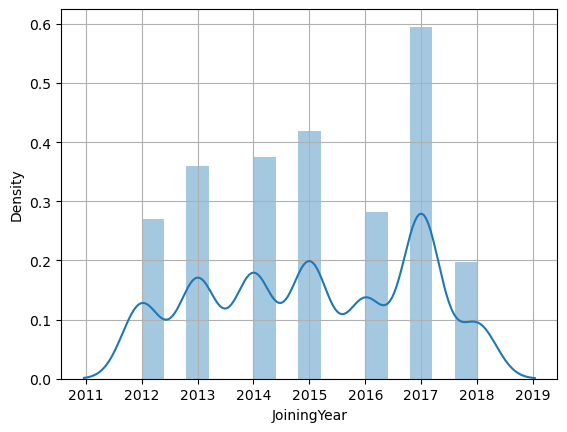

In [826]:
sns.distplot(x['JoiningYear'], bins=15)
plt.grid()
pass

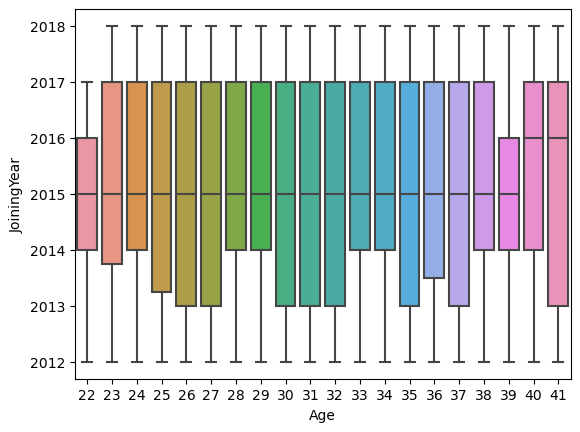

In [827]:


sns.boxplot(x="Age", y="JoiningYear", data=x)
pass



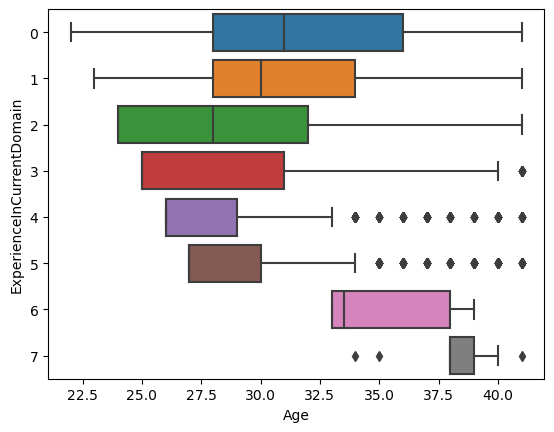

In [828]:
sns.boxplot(x="Age", y="ExperienceInCurrentDomain", data=x)
pass

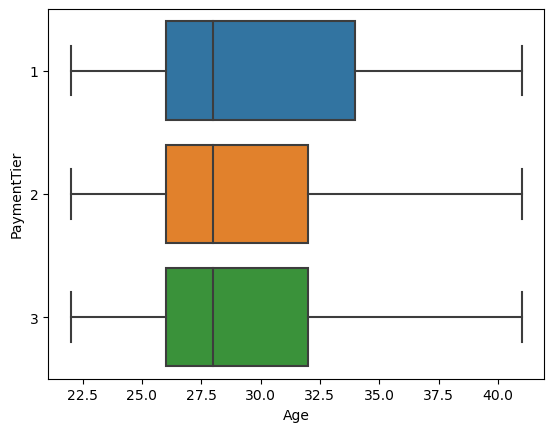

In [829]:
sns.boxplot(x="Age", y="PaymentTier", data=x)
pass

,Age,JoiningYear,PaymentTier,ExperienceInCurrentDomain,LeaveOrNot
Age,1.000000,0.013165,0.007631,-0.134643,-0.051126
JoiningYear,0.013165,1.000000,-0.096078,-0.036525,0.181705
PaymentTier,0.007631,-0.096078,1.000000,0.018314,-0.197638
ExperienceInCurrentDomain,-0.134643,-0.036525,0.018314,1.000000,-0.030504
LeaveOrNot,-0.051126,0.181705,-0.197638,-0.030504,1.000000


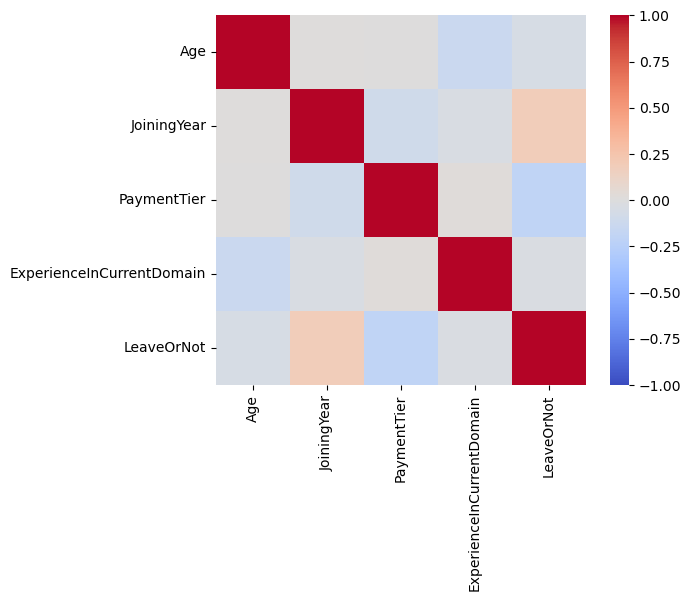

In [830]:
corr_mat = x[["Age","JoiningYear","PaymentTier","ExperienceInCurrentDomain","LeaveOrNot"]].corr()
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')
corr_mat


От года когда пришёл зависит ушел ли и сколько получал. И от возраста опыт в сфере. Логично

In [831]:
corr_mat > 0.5

,Age,JoiningYear,PaymentTier,ExperienceInCurrentDomain,LeaveOrNot
Age,True,False,False,False,False
JoiningYear,False,True,False,False,False
PaymentTier,False,False,True,False,False
ExperienceInCurrentDomain,False,False,False,True,False
LeaveOrNot,False,False,False,False,True


In [832]:
data_numerical = x[numerical_columns]
data_numerical.describe()

print(data_numerical)
pass

      JoiningYear  Age
0            2017   34
1            2013   28
2            2014   38
3            2016   27
4            2017   24
...           ...  ...
4648         2013   26
4649         2013   37
4650         2018   27
4651         2012   30
4652         2015   33

[4653 rows x 2 columns]


In [833]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

data_numerical.describe()

,JoiningYear,Age
count,4.653000e+03,4.653000e+03
mean,1.687176e-14,2.443302e-16
std,1.000000e+00,1.000000e+00
min,-1.643774e+00,-1.531944e+00
25%,-1.107114e+00,-7.031151e-01
50%,-3.379355e-02,-2.887007e-01
75%,1.039527e+00,5.401281e-01
max,1.576187e+00,2.404993e+00


In [834]:
binary_columns    = [c for c in categorical_columns if x[c].nunique() == 2]
nonbinary_columns = [c for c in categorical_columns if x[c].nunique() > 2]
print(binary_columns, nonbinary_columns)




['Gender', 'EverBenched', 'LeaveOrNot'] ['Education', 'City', 'PaymentTier', 'ExperienceInCurrentDomain']


In [835]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

KeyError: "None of [Index(['Education', 'City', 'PaymentTier', 'ExperienceInCurrentDomain'], dtype='object')] are in the [columns]"

In [ ]:
len(data_nonbinary.columns)

17

In [ ]:
x['EverBenched'].unique()

['No', 'Yes']
Categories (2, object): ['No', 'Yes']

In [ ]:
x['EverBenched'] = x['EverBenched'].astype(str)
x.loc[x['EverBenched'] == 'Yes', 'EverBenched'] = 0
x.loc[x['EverBenched'] == 'No', 'EverBenched'] = 1


x['EverBenched'].describe()



count     4653
unique       2
top          1
freq      4175
Name: EverBenched, dtype: int64

In [ ]:
x['LeaveOrNot'].unique()

[0, 1]
Categories (2, int64): [0, 1]

In [ ]:
x['LeaveOrNot'] = x['LeaveOrNot'].astype(str)
x.loc[x['LeaveOrNot'] == '0', 'LeaveOrNot'] = 0
x.loc[x['EverBenched'] == '1', 'LeaveOrNot'] = 1


x['EverBenched'].describe()

count     4653
unique       2
top          1
freq      4175
Name: EverBenched, dtype: int64

In [ ]:
x['Gender'].unique()

['Male', 'Female']
Categories (2, object): ['Female', 'Male']

In [ ]:
x['Gender'] = x['Gender'].astype(str)
x.loc[x['Gender'] == 'Male', 'Gender'] = 0
x.loc[x['Gender'] == 'Female', 'Gender'] = 1


x['Gender'].describe()

count     4653
unique       2
top          0
freq      2778
Name: Gender, dtype: int64

In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Education                  4653 non-null   category
 1   JoiningYear                4653 non-null   int64   
 2   City                       4653 non-null   category
 3   PaymentTier                4653 non-null   category
 4   Age                        4653 non-null   int64   
 5   Gender                     4653 non-null   object  
 6   EverBenched                4653 non-null   object  
 7   ExperienceInCurrentDomain  4653 non-null   category
 8   LeaveOrNot                 4653 non-null   object  
dtypes: category(4), int64(2), object(3)
memory usage: 200.8+ KB


In [837]:
data = pd.concat(( data_nonbinary, x[['Gender','LeaveOrNot','EverBenched']]), axis = 1)
data.shape

(4653, 20)

In [838]:
data.describe()

,Education_Bachelors,Education_Masters,Education_PHD,City_Bangalore,City_New Delhi,City_Pune,PaymentTier_1,PaymentTier_2,PaymentTier_3,ExperienceInCurrentDomain_0,ExperienceInCurrentDomain_1,ExperienceInCurrentDomain_2,ExperienceInCurrentDomain_3,ExperienceInCurrentDomain_4,ExperienceInCurrentDomain_5,ExperienceInCurrentDomain_6,ExperienceInCurrentDomain_7,Gender,LeaveOrNot,EverBenched
count,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653,4653
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Male,0,No
freq,3601,3780,4474,2425,3496,3385,4410,3735,3492,4298,4095,3566,3867,3722,3734,4645,4644,2778,3053,4175
